<a href="https://colab.research.google.com/github/Ayushman0Singh/CardiovascularDiseaseRiskPrediction/blob/main/CardiovascularRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

In [2]:
file_path = '/content/drive/MyDrive/Almabetter/Capstone Projects/Supervised ML-Classification /Copy of data_cardiovascular_risk.csv' #loading the dataset/ filepath 
df = pd.read_csv(file_path) # saving data set as df

In [3]:
df.head(5) #first look at the columns 

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df.shape # no of rows and columns 

(3390, 17)

# DATA SET

Getting a first look at the data set. We can say that the dataset provides the patient's information. It includes over 3,000 records and 15 attributes. Variables Each attribute is a potential risk factor which could contribut to Coronary Heart Disease(CHD) which is our dependent variable for this problem. The features given to us can be divided into multiple catagories such as demographic, behavioral and medical risk factors.

Lets have look at these attributes.


**Age**: Age of the Subject;(Continuous - converted to whole numbers)

**Sex**: male or female(Nominal)

**Education**: Education of the subject

**is_Smoking**: whether or not the patient is a smoker (Nominal)

**Cigs_Per_Day**: the number of cigarettes the person smoked on average in one day.(continuous)

**BPMeds**: whether or not the patient was on blood pressure medication (Nominal)

**PrevalentStroke**: whether or not the patient had previously had a stroke (Nominal)

**PrevalentHyp**: whether or not the patient was hypertensive (Nominal)

**Diabetes**: whether or not the patient had diabetes (Nominal)

**TotChol**: total cholesterol level (Continuous)

**SysBP**: systolic blood pressure (Continuous)

**DiaBP**: diastolic blood pressure (Continuous)

**BMI**: Body Mass Index (Continuous)

**Heart Rate**: heart rate (Continuous)

**Glucose**: glucose level (Continuous)

**Ten_Year_CHD (Target Variable)**: rist of getting a coronary heart disease in 10 years (Nominal(yes or no))

These is my interpretation of the columns given to us in the data set. There demographic features such as age/sex. There are behavioral features related to smoking. We also have many health related medical information on the subjects.


# Exploratory Data Analysis

**Null values in the data set**

In [5]:
#null values in the data set
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

The nnumber of null values is low compared to the whole data set. glucose seems to have the highest number of null values. 304 rows are null out of 3390 rows. The total nuber of null values is less than 10 percent for the hight null valued column. So, its safe to drop these rows.

In [6]:
# dropping null values
df = df.dropna(how ='any')

Education column doesnt contribute anything towards the target variable.

In [7]:
# droping the education column since it has no effect on Ten_year_CHD
df.drop(labels = 'education', axis = 1, inplace = True)

In [9]:
df.shape

(2927, 16)

Lets have a look at the distribution of target variable. Since our data get might have class imbalance. 

In [10]:
#prevalance in the data set
df['TenYearCHD'].value_counts(normalize=True)

0    0.848309
1    0.151691
Name: TenYearCHD, dtype: float64

85 percent of the data has no Ten_year_CHD while 15 percent is positive

**Data Type Check**


Next, We will check if the data-types are correct for the the columns or we need to do some data cleaning before we move to distributions.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2927 non-null   int64  
 1   age              2927 non-null   int64  
 2   education        2927 non-null   float64
 3   sex              2927 non-null   object 
 4   is_smoking       2927 non-null   object 
 5   cigsPerDay       2927 non-null   float64
 6   BPMeds           2927 non-null   float64
 7   prevalentStroke  2927 non-null   int64  
 8   prevalentHyp     2927 non-null   int64  
 9   diabetes         2927 non-null   int64  
 10  totChol          2927 non-null   float64
 11  sysBP            2927 non-null   float64
 12  diaBP            2927 non-null   float64
 13  BMI              2927 non-null   float64
 14  heartRate        2927 non-null   float64
 15  glucose          2927 non-null   float64
 16  TenYearCHD       2927 non-null   int64  
dtypes: float64(9),

All the data-types are in the correct format, no cleaning is required.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


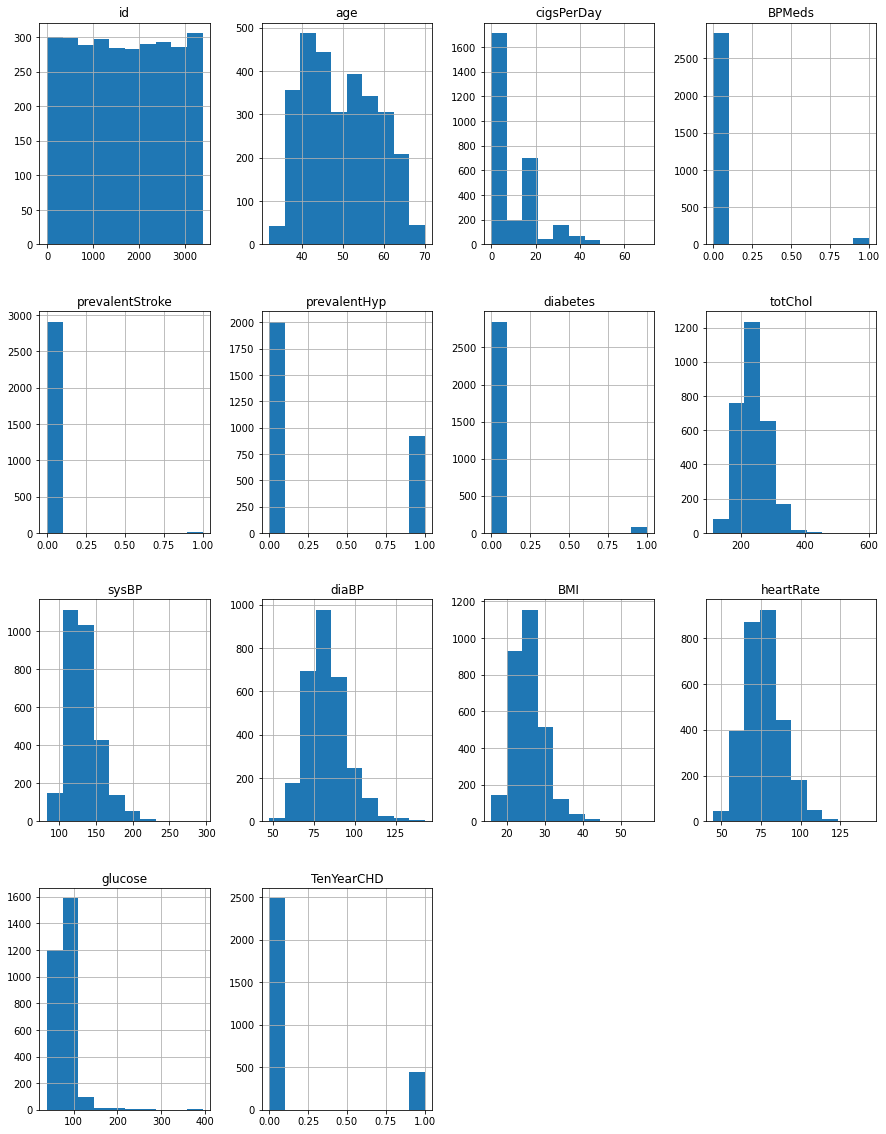

In [12]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [ ]:
#selecting features froms the data
features = list(df.columns)[1:-1]
X = df[features]
y = df['TenYearCHD']
#determining the numeric/catagorical feature
cat_col = ['sex', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes']
all_columns = list(X.columns)
numeric_col = [i for i in all_columns if i not in cat_col]
numeric_col

['age',
 'cigsPerDay',
 'BPMeds',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
# Using standard Scalar on the numeric features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[numeric_col]= sc.fit_transform(X[numeric_col])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
X = pd.get_dummies(X,columns=['sex', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes'])
X.sample(3)

,age,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
1979,2.151379,-0.767017,-0.176059,-0.159826,-0.386447,-1.068678,-0.713626,-0.491954,-0.910035,0,1,1,0,1,0,1,0,1,0
1352,2.035042,-0.767017,-0.176059,0.602409,0.285525,-0.240645,-0.011391,-0.074214,0.210166,1,0,1,0,1,0,0,1,1,0
471,-1.338729,2.178924,-0.176059,-1.639459,-1.013620,-0.571858,-0.471476,-0.659050,0.044210,1,0,0,1,1,0,1,0,1,0


In [ ]:
 #test-train split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.15, stratify= y , random_state = 42) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2487, 19)
(440, 19)
(2487,)
(440,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# Decision Trees

In [ ]:
#Decision tree Classifier Hyperparameter tunning
DT= DecisionTreeClassifier()
DT_param = {'max_depth':np.arange(10,40,2), 'max_leaf_nodes':np.arange(50,150,10)}
DT = GridSearchCV(DT, param_grid= DT_param, scoring ='f1' , cv = 5)
DT.fit(X_train,y_train)
print(DT.best_params_)
DT = DT.best_estimator_

{'max_depth': 14, 'max_leaf_nodes': 140}


In [ ]:
y_pred_test_DT = DT.predict(X_test)
y_pred_train_DT = DT.predict(X_train)
print('f1 score on test set:', f1_score(y_test,y_pred_test_DT))
print('f1 score on train set:',f1_score(y_train,y_pred_train_DT) )
print('Auc_score Test:', roc_auc_score(y_test,y_pred_test_DT))
print('Auc_score Train:', roc_auc_score(y_train,y_pred_train_DT))
# Recall is an important metric in this case
print('Recall Score:', recall_score(y_test,y_pred_test_DT,pos_label=1))
print('Overall acccuracy', balanced_accuracy_score(y_train,y_pred_train_DT))
# Since its binary classiffication, lets check the confusion matrix
print('\nConfusion matrix\n', confusion_matrix(y_test,y_pred_test_DT))
print('Confusion matrix train\n', confusion_matrix(y_train,y_pred_train_DT,labels=[1,0]))
print('Confusion matrix model\n', confusion_matrix(y_test,y_pred_test_DT,labels=[1,0]) + confusion_matrix(y_train,y_pred_train_DT,labels=[1,0]))

f1 score on test set: 0.11764705882352941
f1 score on train set: 0.7539936102236422
Auc_score Test: 0.5059021247649154
Auc_score Train: 0.809916778759727
Recall Score: 0.08955223880597014
Overall acccuracy 0.809916778759727

Confusion matrix
 [[344  29]
 [ 61   6]]
Confusion matrix train
 [[ 236  141]
 [  13 2097]]
Confusion matrix model
 [[ 242  202]
 [  42 2441]]


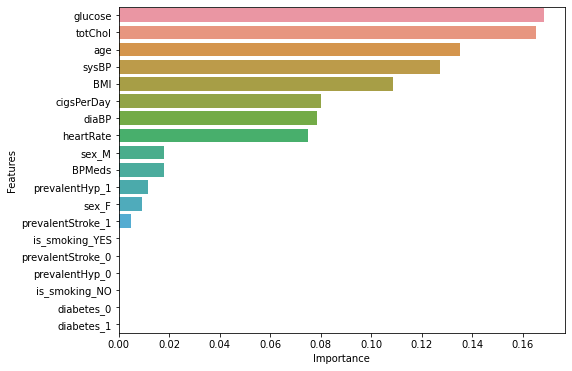

In [ ]:
feature_imp=DT.feature_importances_
Columns = X_train.columns
featureImp_DT = pd.DataFrame(zip(Columns,feature_imp), columns = ('Features','Importance'))
featureImp_DT.sort_values(['Importance'], axis=0, ascending=False, inplace=True)
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Features', data= featureImp_DT)

# Random forest

In [ ]:
# RF hyper parameter tunnig
rf = RandomForestClassifier()
rf_params = {'n_estimators':[150,200,250], 'max_depth': np.arange(2,15)}
rf = GridSearchCV(rf , param_grid=rf_params,scoring = 'f1', cv=5)
rf.fit(X_train,y_train)
print(rf.best_params_)
RF= rf.best_estimator_
#, 'max_leaf_nodes': np.arange(100,300,20)

{'max_depth': 13, 'n_estimators': 250}


In [ ]:
y_pred_test_RF = RF.predict(X_test)
y_pred_train_RF = RF.predict(X_train)
print('f1 score on test set:', f1_score(y_test,y_pred_test_RF))
print('f1 score on train set:',f1_score(y_train,y_pred_train_RF) )
print('Auc_score Test:', roc_auc_score(y_test,y_pred_test_RF))
print('Auc_score Train:', roc_auc_score(y_train,y_pred_train_RF))
# Recall is an important metric in this case
print('Recall Score:', recall_score(y_test,y_pred_test_RF))
print('Overall acccuracy', balanced_accuracy_score(y_train,y_pred_train_RF))
# Since its binary classiffication, lets check the confusion matrix
print('\nConfusion matrix\n', confusion_matrix(y_test,y_pred_test_RF,labels=[1,0]))
print('Confusion matrix train\n', confusion_matrix(y_train,y_pred_train_RF,labels=[1,0]))
print('Confusion matrix model\n', confusion_matrix(y_test,y_pred_test_RF,labels=[1,0]) + confusion_matrix(y_train,y_pred_train_RF,labels=[1,0]))

f1 score on test set: 0.028169014084507043
f1 score on train set: 0.4421487603305785
Auc_score Test: 0.5034412388459846
Auc_score Train: 0.6419098143236074
Recall Score: 0.014925373134328358
Overall acccuracy 0.6419098143236074

Confusion matrix
 [[  1  66]
 [  3 370]]
Confusion matrix train
 [[ 107  270]
 [   0 2110]]
Confusion matrix model
 [[ 108  336]
 [   3 2480]]


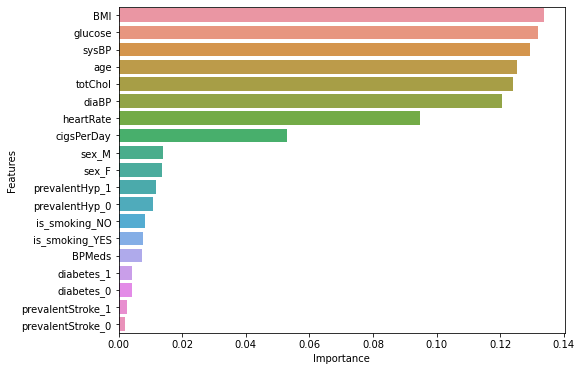

In [ ]:
#plotting feature importance
feature_imp_RF = RF.feature_importances_
featureImp_RF = pd.DataFrame(zip(Columns,feature_imp_RF), columns = ('Features','Importance'))
featureImp_RF.sort_values(['Importance'], axis=0, ascending=False, inplace=True)
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Features', data= featureImp_RF)

# XGB

In [ ]:
import xgboost as xgb

['age',
 'cigsPerDay',
 'BPMeds',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'sex_F',
 'sex_M',
 'is_smoking_NO',
 'is_smoking_YES',
 'prevalentStroke_0',
 'prevalentStroke_1',
 'prevalentHyp_0',
 'prevalentHyp_1',
 'diabetes_0',
 'diabetes_1']